#### Import libraries

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split
import random

### Data overview - what we have?

#### 1) data structure:

In [2]:
data_dir = "data/dataset"
class_folders = os.listdir(data_dir)

total_images = 0

classes = []
image_counts = []

print("Classes:")
print()
for class_folder in class_folders:
    class_folder_path = os.path.join(data_dir, class_folder)
    
    if os.path.isdir(class_folder_path):
        image_files = [f for f in os.listdir(class_folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        num_images = len(image_files)
        print(f"{class_folder}, n: {len(image_files)}")
        total_images += num_images
        classes.append(class_folder)
        image_counts.append(num_images)

print("")
print("number of images:")
print(total_images)

Classes:

dew, n: 698
fogsmog, n: 851
frost, n: 475
glaze, n: 639
hail, n: 591
lightning, n: 377
rain, n: 526
rainbow, n: 232
rime, n: 1160
sandstorm, n: 692
snow, n: 621

number of images:
6862


**Comment:**

So, I have dataset of weather classification task.
We have 6862 samples with 11 classes. Classes are not balanced, (max 1160 for rime, min 232 for rainbow). Data is stored in "dataset" folder, which has 11 folders with classes respectively.
At this stage the data looks verified (Kaggle dataset). Also I looked through images, so data doesn't have any critical noise nor dublicates.

1. `dataset/`
    1. `dew/`
        - image1.jpg
        - image2.jpg
        - .....
    2. `fogsmog/`
        - image1.jpg
        - image2.jpg
        - .....
    3. `frost/`
        - image1.jpg
        - image2.jpg
        - .....
    4. `glaze/`
        - image1.jpg
        - image2.jpg
        - .....
    5. `hail/`
        - image1.jpg
        - image2.jpg
        - .....
    6. `lightning/`
        - image1.jpg
        - image2.jpg
        - .....
    7. `rain/`
        - image1.jpg
        - image2.jpg
        - .....
    8. `rainbow/`
        - image1.jpg
        - image2.jpg
        - .....
    9. `rime/`
        - image1.jpg
        - image2.jpg
        - .....
    10. `sandstorm/`
        - image1.jpg
        - image2.jpg
        - .....
    11. `snow/`
        - image1.jpg
        - image2.jpg
        - .....

Number of images per class in hystogram view:

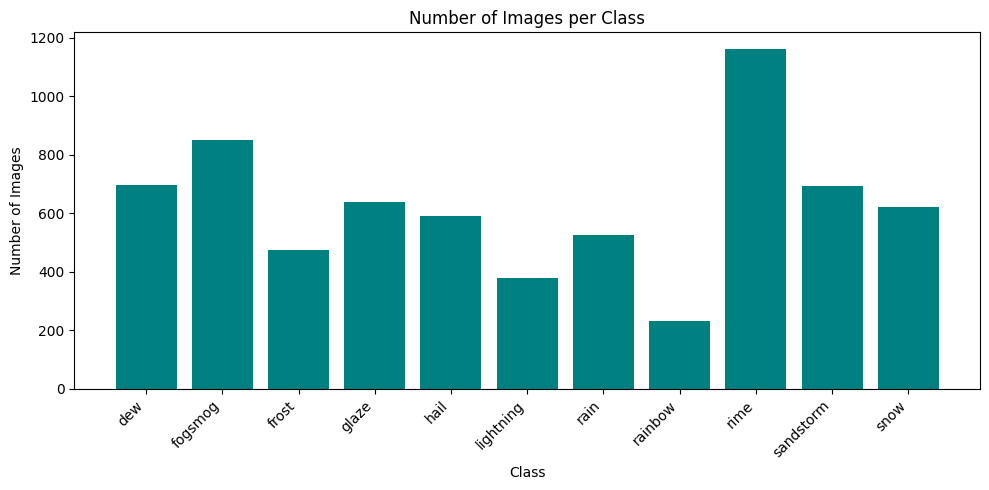

In [6]:
plt.figure(figsize=(10, 5))
plt.bar(classes, image_counts, color='teal')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 2) Images:

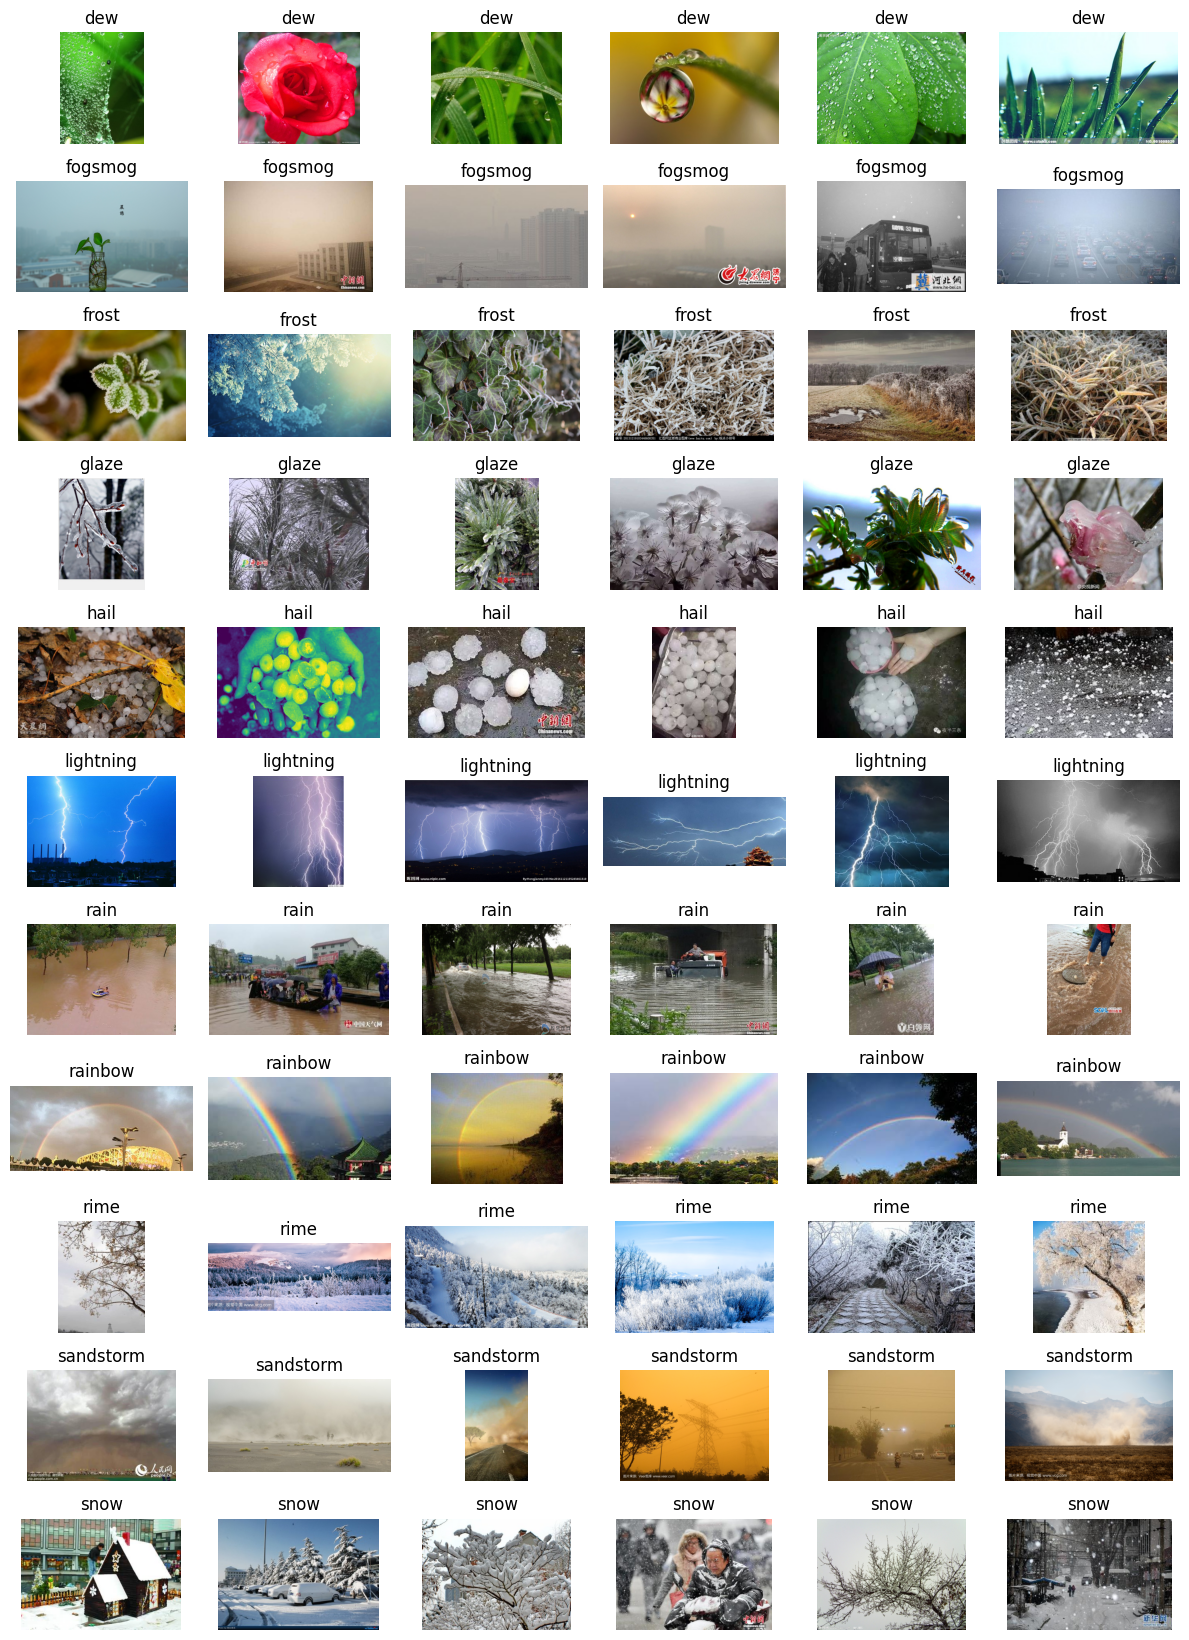

In [59]:
class_folders = os.listdir(data_dir)

fig, axes = plt.subplots(len(class_folders), 6, figsize=(12, len(class_folders)*1.5))

for i, class_folder in enumerate(class_folders):
    class_path = os.path.join(data_dir, class_folder)
    
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    selected_images = random.sample(image_files, 6)
    
    for j, image_file in enumerate(selected_images):
        image_path = os.path.join(class_path, image_file)
        img = Image.open(image_path)
        
        axes[i, j].imshow(img)
        axes[i, j].axis('off') 
        axes[i, j].set_title(f"{class_folder}")

plt.tight_layout()
plt.show()

#### 3) Image size

It looks like images are not the same size. Let's check: 

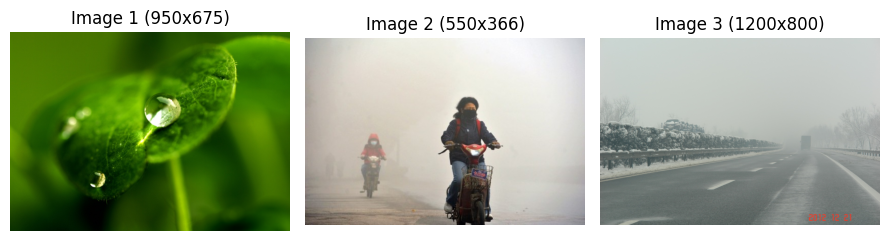

In [68]:
def print_examples(path):
    image_paths = [
        f"{path}//dew//2208.jpg",   
        f"{path}//fogsmog//4138.jpg", 
        f"{path}//snow//0835.jpg"    
    ]
    
    plt.figure(figsize=(9, 5))
    
    for i, image_path in enumerate(image_paths):
        img = Image.open(image_path)
        img_size = img.size  
        
        plt.subplot(1, 3, i+1)  
        plt.imshow(img)
        plt.axis('off')  
        plt.title(f"Image {i+1} ({img.size[0]}x{img.size[1]})") 
    
    plt.tight_layout()
    plt.show()

print_examples(data_dir)

Yes, the size of images is different. I need make them having the same size

### Reduction to one size

In [62]:
input_dir = 'data\dataset'
output_dir = 'data\dataset-resized' 

In [14]:
image_size = (224, 224)

In [16]:
def resize_image(input_dir, output_dir, image_size):
    for class_folder in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_folder)
        
        if os.path.isdir(class_path):
            
            output_class_path = os.path.join(output_dir, class_folder)
            os.makedirs(output_class_path, exist_ok=True)
    
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                
                if os.path.isfile(image_path) and image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    
                    img = Image.open(image_path)
                    img_resized = img.resize(image_size)
                    
                    if img_resized.mode in ['RGBA', 'P', 'L', '1']:
                        img_resized = img_resized.convert('RGB')
                    
                    img_resized.save(os.path.join(output_class_path, image_file))

Run the resize function (all images would be resized to one value and stored in "dataset-resized" folder):

In [ ]:
# def resize_image(input_dir, output_dir, image_size)

Check resizing: 

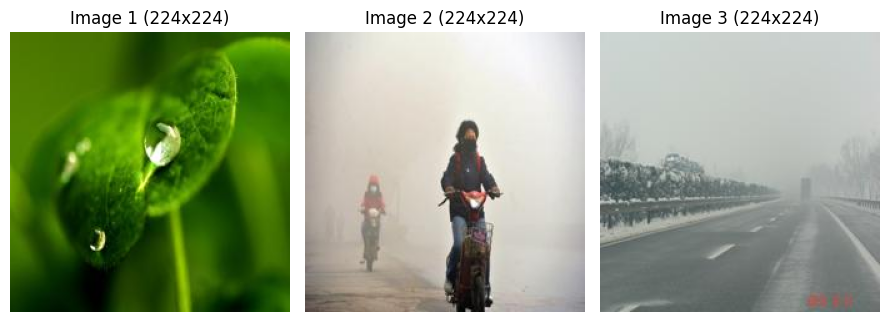

In [69]:
print_examples(output_dir)

Now all images have the same size (224x224).
Let's split on train/test/valid folders with 70/15/15 proportion

### Split on train/valid/test folders

As my classes are not balanced, i use proportional (Stratified Sampling). It would maintain the same class distribution in the splits. 
Each class has a similar proportion in the train, validation, and test sets

In [1]:
input_dir = "data/dataset-resized"
output_dir = "data/split_dataset"

In [26]:
classes = ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']

In [27]:
image_paths = []
labels = []

Get paths to all images:

In [28]:
for label, class_folder in enumerate(classes):
    class_folder_path = os.path.join(input_dir, class_folder)
    for image_file in os.listdir(class_folder_path):
        if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(class_folder_path, image_file))
            labels.append(label)

Splitting the dataset:

In [29]:
train_paths, temp_paths, train_labels, temp_labels = train_test_split(image_paths, labels, test_size=0.3, stratify=labels)
val_paths, test_paths, val_labels, test_labels = train_test_split(temp_paths, temp_labels, test_size=0.5, stratify=temp_labels)

Create the output directory structure:

In [30]:
for split in ['train', 'val', 'test']:
    for class_folder in classes:
        os.makedirs(os.path.join(output_dir, split, class_folder), exist_ok=True)

Move the images to the corresponding directories

In [31]:
def move_images(image_paths, labels, split):
    for img_path, label in zip(image_paths, labels):
        class_name = classes[label]
        img_name = os.path.basename(img_path)
        output_class_path = os.path.join(output_dir, split, class_name, img_name)
        shutil.copy(img_path, output_class_path)

In [32]:
move_images(train_paths, train_labels, 'train')
move_images(val_paths, val_labels, 'val')
move_images(test_paths, test_labels, 'test')

Checking structure of splitted data:

In [15]:
def count_images_in_folders(root_dir):
    total_images = 0
    train_n = 0
    val_n = 0
    test_n = 0
    for folder in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, folder)
        if os.path.isdir(folder_path):
            for class_folder in os.listdir(folder_path):
                class_folder_path = os.path.join(folder_path, class_folder)
                if os.path.isdir(class_folder_path):
                    image_count = len([f for f in os.listdir(class_folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
                    print(f"{folder} - {class_folder}: {image_count} images")
                    total_images += image_count
                    if folder == 'train':
                        train_n += image_count
                    elif folder == 'val':
                        val_n += image_count
                    elif folder == 'test':
                        test_n += image_count
                    
                    
    print("\nTotal number of images:", total_images)  
    print(f"Total images in 'train' folder: {train_n}")
    print(f"Total images in 'val' folder: {val_n}")
    print(f"Total images in 'test' folder: {test_n}")

In [16]:
count_images_in_folders(output_dir)

test - dew: 105 images
test - fogsmog: 128 images
test - frost: 71 images
test - glaze: 96 images
test - hail: 89 images
test - lightning: 56 images
test - rain: 79 images
test - rainbow: 35 images
test - rime: 174 images
test - sandstorm: 104 images
test - snow: 93 images
train - dew: 489 images
train - fogsmog: 596 images
train - frost: 332 images
train - glaze: 447 images
train - hail: 414 images
train - lightning: 264 images
train - rain: 368 images
train - rainbow: 162 images
train - rime: 812 images
train - sandstorm: 484 images
train - snow: 435 images
val - dew: 104 images
val - fogsmog: 127 images
val - frost: 72 images
val - glaze: 96 images
val - hail: 88 images
val - lightning: 57 images
val - rain: 79 images
val - rainbow: 35 images
val - rime: 174 images
val - sandstorm: 104 images
val - snow: 93 images

Total number of images: 6862
Total images in 'train' folder: 4803
Total images in 'val' folder: 1029
Total images in 'test' folder: 1030


The split data is ready. Here is approximate look of folder`s structure:

1. `split_dataset/`
    1. `train/`
        - `class1/`
        - `class2/`
        - ...
    2. `test/`
        - `class1/`
        - `class2/`
        - ...
    3. `val/`
        - `class1/`
        - `class2/`
        - ...

### Conclusion

Here I made primarly analisys of dataset. Then i resize all images to one size and splitted it in train/test/valid folders

In the second file "data-preparation - 2" i will transform splitted data, so it could be used for image classification 